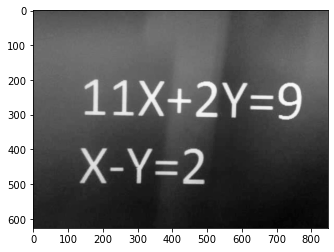

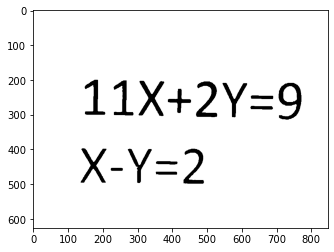

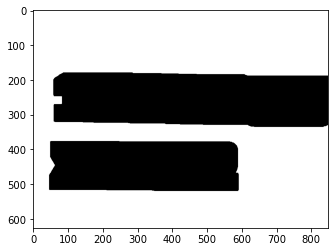

2


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

img = cv.imread('Equation_Image.jpeg', 0)
plt.imshow(img, cmap = 'Greys')
plt.show()
length, width = (img.shape)
for i in range(length):                                     #applying binarization
    for j in range(width):                                  #from the histogram, 100 seems like a good threshold
        if img[i][j] > 100:
            img[i][j] = 0
        else:
            img[i][j] = 255
            
plt.imshow(img, cmap = 'Greys')
plt.show()

kernel = np.ones((1,20), np.uint8)      # Our kernel is a 1-D matrix consisting of 20 1's
kernel2 = np.ones(shape = (15,1))       # second kernel is to increase height of foreground block

dilation = cv.dilate(img,kernel,iterations = 10)    # dilating 10 times with kernel to get foreground blocks

dilation = cv.dilate(dilation,kernel2,iterations = 3)  # Second dilation is to increase height of foreground blocks slightly

plt.imshow(dilation, cmap = 'Greys')
plt.show()

contours_for_equation, hierarchy = cv.findContours(dilation,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(len(contours_for_equation))   

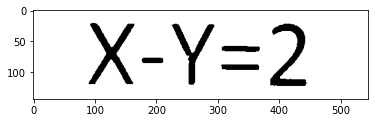

In [2]:
X,Y,W,H = cv.boundingRect(contours_for_equation[0])

im = img[Y:Y+H,X:X+W]

plt.imshow(im, cmap = 'Greys')
plt.show()

15


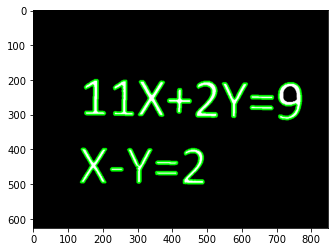

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt 

img = cv.imread('Equation_Image.jpeg', 0)
length, width = (img.shape)
for i in range(length):                                     #applying binarization
    for j in range(width):                                  #from the histogram, 100 seems like a good threshold
        if img[i][j] > 100:
            img[i][j] = 255
        else:
            img[i][j] = 0

import numpy as np


img_new = np.zeros((length, width), dtype='uint8')

for i in range(length):                                     #applying binarization
    for j in range(width):                                  #from the histogram, 100 seems like a good threshold
        if img[i][j] > 0:
            img_new[i][j] = 0
        else:
            img_new[i][j] = 255

img_without_box = img_new
contours, hierarchy = cv.findContours(img_new,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(len(contours))                                              # printing the total number of contours
img_3d = cv.cvtColor(img_new,cv.COLOR_GRAY2RGB)
cv.drawContours(img_3d, contours, -1, (0,255,0), 3)               # Drawing all the contours

plt.imshow(img_3d, cmap = 'Greys')



(100, 60)


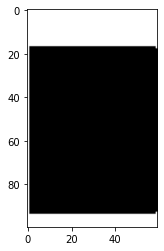

(100, 60)


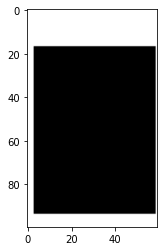

(100, 60)


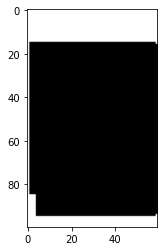

(100, 60)


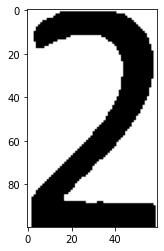

(100, 60)


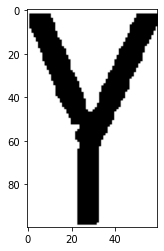

(100, 60)


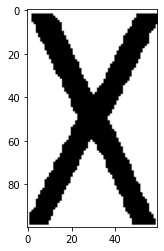

(100, 60)


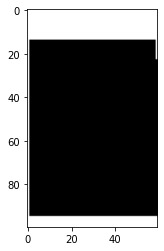

(100, 60)


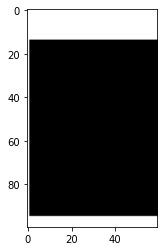

(100, 60)


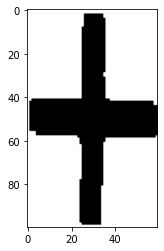

(100, 60)


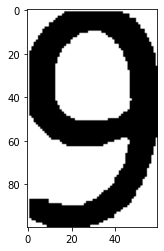

(100, 60)


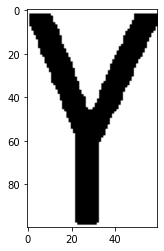

(100, 60)


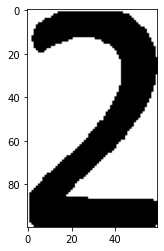

(100, 60)


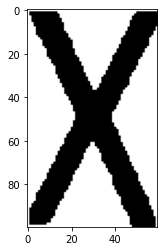

(100, 60)


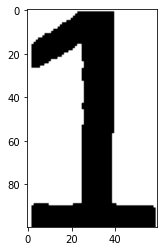

(100, 60)


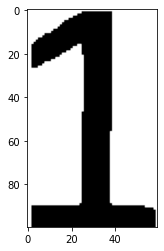

In [4]:
character = []
character_position = []
for i in range(0, len(contours)):
    x,y,w,h = cv.boundingRect(contours[i])                   #printing all the images of the bouding rectanges
    im = cv.rectangle(img_new,(x,y),(x+w,y+h),(0,255,0),2)
    im = img_without_box[y:y+h,x:x+w]
    im = cv.resize(im, (60,100))                                         # resizing to (60,100)
    length, width = (im.shape)
    print(im.shape)
    im_new = np.zeros((length, width), dtype='uint8')

    for i in range(length):                                     #applying binarization
        for j in range(width):                                  #from the histogram, 100 seems like a good threshold
            if im[i][j] > 0:
                im_new[i][j] = 255
            else:
                im_new[i][j] = 0


    character.append(im_new)
    character_position.append((x,y))
    
    plt.imshow(im_new, cmap = 'Greys')
    plt.show()

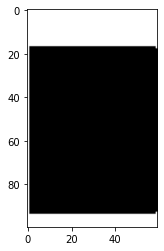

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


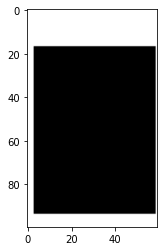

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


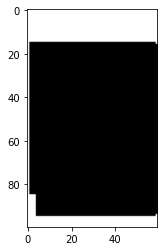

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


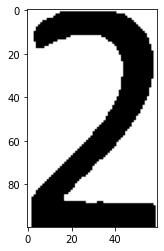

[0, 1, 0, 0, 0, 0, 1, 1, 1, 0]


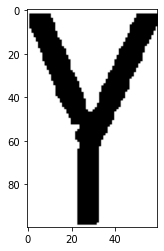

[1, 0, 1, 0, 1, 0, 0, 1, 0, 0]


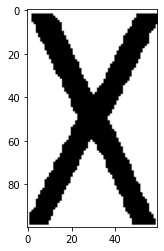

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


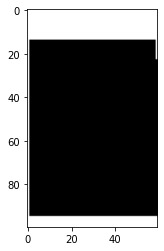

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


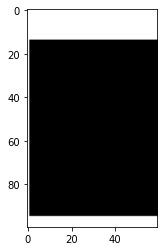

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


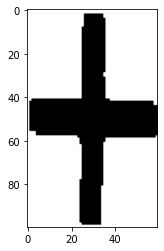

[0, 1, 0, 1, 1, 1, 0, 1, 0, 1]


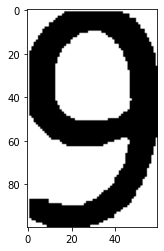

[0, 1, 0, 1, 1, 1, 1, 1, 0, 0]


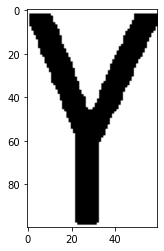

[1, 0, 1, 0, 1, 0, 0, 1, 0, 0]


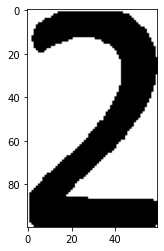

[1, 1, 0, 0, 0, 0, 1, 1, 1, 0]


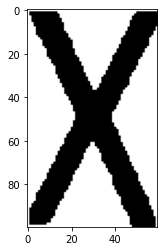

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


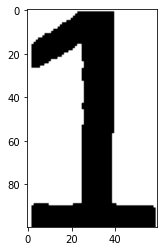

[0, 1, 0, 0, 1, 0, 1, 1, 1, 1]


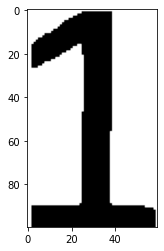

[0, 1, 0, 0, 1, 0, 1, 1, 1, 1]


In [5]:
feat_for_char = []
feature = []
EQ1_char = []
EQ2_char = []
feat = np.zeros(10, dtype='int32')

for p in range(0,len(contours)):
    char = character[p]
    segment1 = char[0:10,0:10]
    segment2 = char[0:10,25:35]
    segment3 = char[0:10,50:60]                         #finding features for images
    segment4 = char[45:55,0:10]
    segment5 = char[45:55,25:35]
    segment6 = char[45:55,50:60]
    segment7 = char[90:100,0:10]
    segment8 = char[90:100,25:35]
    segment9 = char[90:100,50:60]
    segment10 = char[20:30,25:35]
    segment = np.array((segment1,segment2,segment3,segment4,segment5,segment6,segment7,segment8,segment9,segment10))

    for n in range(0,10):
        count = 0
        for i in range(0,10):
            for j in range(0,10):
                if segment[n][i][j] == 0:
                    count +=1
        if count<75:
            feat[n] = 1
        feature.append(feat[n])

    feat_for_char.append(feature)
    plt.imshow(character[p], cmap = 'Greys')
    plt.show()
    print(feature)
    
    feature = []
    feat = np.zeros(10, dtype='int32')
    

In [6]:
num = 0                                                         # function to classify based on feature values     
def classify(i):
    if (feat_for_char[i][0]==0 and feat_for_char[i][1]==0 and feat_for_char[i][2]==0):
        return "dash"
    
    if (feat_for_char[i][6] and feat_for_char[i][7] and feat_for_char[i][8]):
        if (feat_for_char[i][4]):
            return str(1)
        else:
            return str(2)

    if (feat_for_char[i][1] and feat_for_char[i][3] and feat_for_char[i][5] and feat_for_char[i][7]):
        if (feat_for_char[i][4] and feat_for_char[i][9]):
            return "+"
        else:
            if(feat_for_char[i][4]):
                return str(9)
            else:
                return str(0)
    
    if (feat_for_char[i][0] and feat_for_char[i][1]==0 and feat_for_char[i][2]):
        if (feat_for_char[i][7]):
            return "Y"
        else:
            return "X"
    
    if (feat_for_char[i][0] and feat_for_char[i][1] and feat_for_char[i][2]):
        if (feat_for_char[i][3]):
            return str(5)
        else:
            return str(7)
        
    if (feat_for_char[i][0]==0 and feat_for_char[i][1] and feat_for_char[i][2]==0):
        if (feat_for_char[i][3]):
            if(feat_for_char[i][6]):
                return str(9)
            else:
                return str(4)
        else:
            return str(8)
    
    if (feat_for_char[i][0]==1 and feat_for_char[i][1]==1 and feat_for_char[i][2]==0):
        return str(3)
    else:
        return str(6)
        

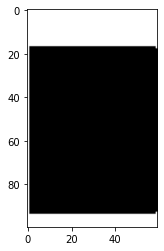

The character is: dash


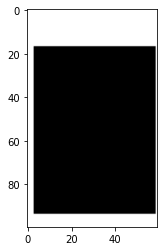

The character is: dash


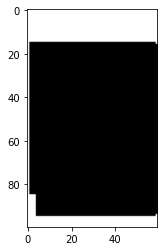

The character is: dash


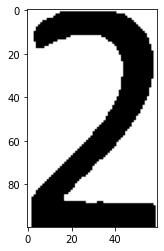

The character is: 2


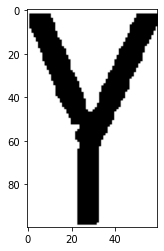

The character is: Y


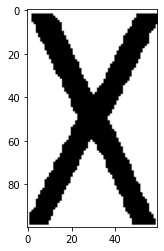

The character is: X


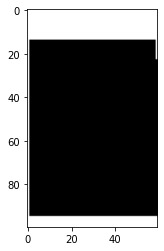

The character is: dash


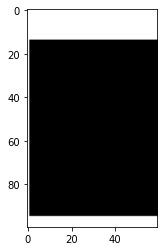

The character is: dash


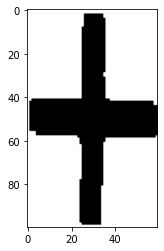

The character is: +


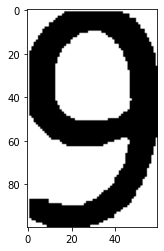

The character is: 9


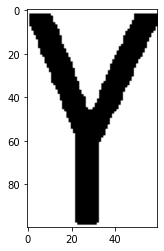

The character is: Y


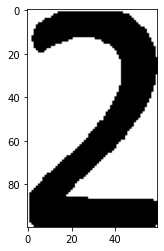

The character is: 2


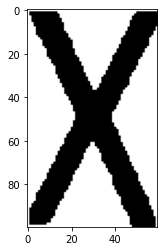

The character is: X


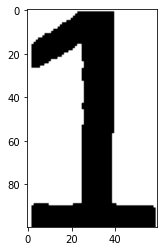

The character is: 1


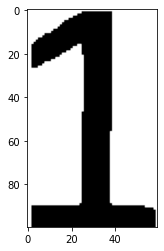

The character is: 1


In [7]:
for i in range(0,len(contours)):
    plt.imshow(character[i], cmap = 'Greys')
    plt.show()
    print("The character is: " + classify(i))         #print characters with classification
    

In [8]:
EQ1 = []
EQ2 = []
EQ1_XCoordinate = []
EQ2_XCoordinate = []
for i in range(0,len(character_position)):              # we separate all characters into EQ1 and EQ2 depending on Y_Coordinate 
    
    if(character_position[i][1]>Y):                         
        EQ1.append(character[i])
        EQ1_XCoordinate.append(character_position[i][0])    # we also obtain the array of XCoordinates for both EQ1 and EQ2
        
    else:
        EQ2.append(character[i])
        EQ2_XCoordinate.append(character_position[i][0])
        



EQ1_order = []

EQ2_order = []
smallest = EQ1_XCoordinate[0]                       # now we sort the XCoordinate arrays, hence obtaining ordered equations

while (len(EQ1_order)<len(EQ1)):
    for i in EQ1_XCoordinate:
        smallest = EQ1_XCoordinate[0]
        for j in EQ1_XCoordinate:
            if(j<smallest):
                smallest = j
            
        EQ1_order.append(EQ1[EQ1_XCoordinate.index(smallest)])
        EQ1_XCoordinate[EQ1_XCoordinate.index(smallest)]=1000          
        
while (len(EQ2_order)<len(EQ2)):
    for i in EQ2_XCoordinate:
        smallest = EQ2_XCoordinate[0]
        for j in EQ2_XCoordinate:
            if(j<smallest):
                smallest = j
            
        EQ2_order.append(EQ2[EQ2_XCoordinate.index(smallest)])
        EQ2_XCoordinate[EQ2_XCoordinate.index(smallest)]=1000
        
        
    
    

    
        


            
            

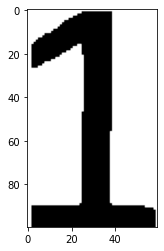

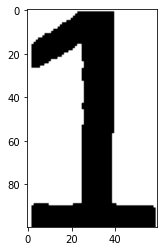

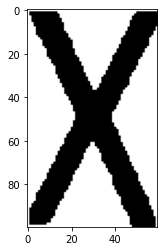

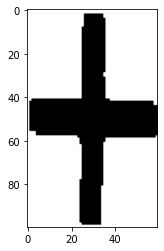

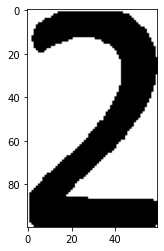

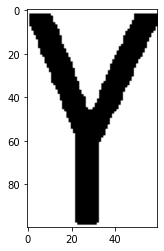

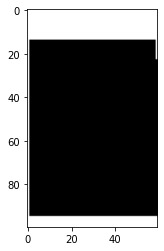

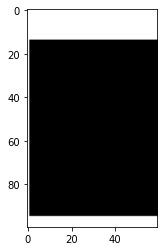

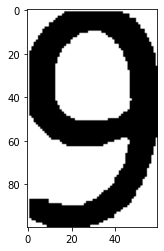

In [9]:
for i in range(len(EQ2)):                                                   # Equation 2 in order
    plt.imshow(EQ2_order[i], cmap = 'Greys')
    plt.show()

In [10]:
feat_for_char = []
feature = []
feat = np.zeros(10, dtype='int32')

for p in range(0,len(EQ2)):
    char = EQ2_order[p]
    segment1 = char[0:10,0:10]
    segment2 = char[0:10,25:35]
    segment3 = char[0:10,50:60]                         #finding features for all elements in EQ2
    segment4 = char[45:55,0:10]
    segment5 = char[45:55,25:35]
    segment6 = char[45:55,50:60]
    segment7 = char[90:100,0:10]
    segment8 = char[90:100,25:35]
    segment9 = char[90:100,50:60]
    segment10 = char[20:30,25:35]
    segment = np.array((segment1,segment2,segment3,segment4,segment5,segment6,segment7,segment8,segment9,segment10))

    for n in range(0,10):
        count = 0
        for i in range(0,10):
            for j in range(0,10):
                if segment[n][i][j] == 0:
                    count +=1
        if count<75:
            feat[n] = 1
        feature.append(feat[n])

    feat_for_char.append(feature)

    
    feature = []
    feat = np.zeros(10, dtype='int32')
    

EQ2_char = []
for i in range(0,len(EQ2)):
         
    EQ2_char.append(classify(i))                    # obtaining equation 2 in the form of characters 
    
    
feat_for_char = []
feature = []
feat = np.zeros(10, dtype='int32')

for p in range(0,len(EQ1)):
    char = EQ1_order[p]
    segment1 = char[0:10,0:10]
    segment2 = char[0:10,25:35]
    segment3 = char[0:10,50:60]                         #finding features for images for equation 1
    segment4 = char[45:55,0:10]
    segment5 = char[45:55,25:35]
    segment6 = char[45:55,50:60]
    segment7 = char[90:100,0:10]
    segment8 = char[90:100,25:35]
    segment9 = char[90:100,50:60]
    segment10 = char[20:30,25:35]
    segment = np.array((segment1,segment2,segment3,segment4,segment5,segment6,segment7,segment8,segment9,segment10))

    for n in range(0,10):
        count = 0
        for i in range(0,10):
            for j in range(0,10):
                if segment[n][i][j] == 0:
                    count +=1
        if count<75:
            feat[n] = 1
        feature.append(feat[n])

    feat_for_char.append(feature)
    
    feature = []
    feat = np.zeros(10, dtype='int32')
    
    
EQ1_char = []
for i in range(0,len(EQ1)):

    EQ1_char.append(classify(i))                  # obtaining equation 1 in the form of characters

Below, we print the 2 equations in form of characters

In [11]:
print(EQ1_char)
print(EQ2_char)

['X', 'dash', 'Y', 'dash', 'dash', '2']
['1', '1', 'X', '+', '2', 'Y', 'dash', 'dash', '9']


In [12]:
a1 = 0
b1 = 0
c1 = 0
a2 = 0
b2 = 0
c2 = 0

EQ = EQ1_char                          #code to get constant values for first equation
for char in EQ:
    if(char=='X'):
        if(EQ.index(char)==0):
            a1 = 1
        else:
            number = ''
            x = EQ.index(char)
            while(x):
                x = x - 1
                number = number + EQ[x]
            a1 = int(number)
    if(char=='Y'):
        x = EQ.index(char)
        number = ''
        while(EQ[x]!='-' and EQ[x]!='+'):
            if(EQ[x-1]=='dash'):
                EQ[x-1]='-'
            number = EQ[x-1] + number
            x = x - 1
            
        if((number=='+' or number=='-')):
            number = number + '1'
        b1 =  int(number)
        
        x = EQ.index(char) + 3
        c1 = EQ[x] 
        
EQ = EQ2_char                          #code to get constant values for second equation
for char in EQ:
    if(char=='X'):
        if(EQ.index(char)==0):
            a2 = 1
        else:
            number = ''
            x = EQ.index(char)
            while(x):
                x = x - 1
                number = number + EQ[x]
            a2 = int(number)
    if(char=='Y'):
        x = EQ.index(char)
        number = ''
        while(EQ[x]!='-' and EQ[x]!='+'):
            if(EQ[x-1]=='dash'):
                EQ[x-1]='-'
            number = EQ[x-1] + number
            x = x - 1
            
        if((number=='+' or number=='-')):
            number = number + '1'
        b2 =  int(number)
        
        x = EQ.index(char) + 3
        c2 = EQ[x]    
            
                

In [13]:
print(str(a1) + " " + str(b1) + " " + str(c1) + " " + str(a2) + " " + str(b2) + " " + str(c2) + " ")


1 -1 2 11 2 9 


In [14]:
A = np.array([[a1,b1],[a2,b2]], dtype='float')               # using numpy matrixes to solve for x and y
B = np.array([c1,c2], dtype='float')


C = np.linalg.solve(A,B)                      # numpy function that returns x and y values

print("X value: " + str(C[0]))
print("Y value: " + str(C[1]))


X value: 1.0
Y value: -1.0
